<a href="https://colab.research.google.com/github/RobsonCrLira/QuarentenaDadosAlura/blob/master/Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
filmes = pd.read_csv('https://raw.githubusercontent.com/RobsonCrLira/QuartentenaDadosAlura/master/ml-latest-small/movies.csv')
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/RobsonCrLira/QuartentenaDadosAlura/master/ml-latest-small/ratings.csv')

In [0]:
filmes.columns  = ["filmeId", "titulo", "generos"]
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'timestamp']

In [0]:
nota_media_por_filmes = avaliacoes.groupby('filmeId')['nota'].mean()

In [0]:
filmes = filmes.join(nota_media_por_filmes,on = 'filmeId')

In [0]:
filmes.rename(columns={'nota': 'media'},inplace=True)

In [0]:
filmes['media'] = round(filmes['media'],2)

In [0]:
votos_por_filmes = avaliacoes.groupby('filmeId')['nota'].count()

In [0]:
filmes = filmes.join(votos_por_filmes,on='filmeId')

In [0]:
filmes.rename( columns={'nota': 'votos_totais'},inplace=True)

In [27]:
filmes['generos'].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [28]:
#Ordenando na ordem decresente
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

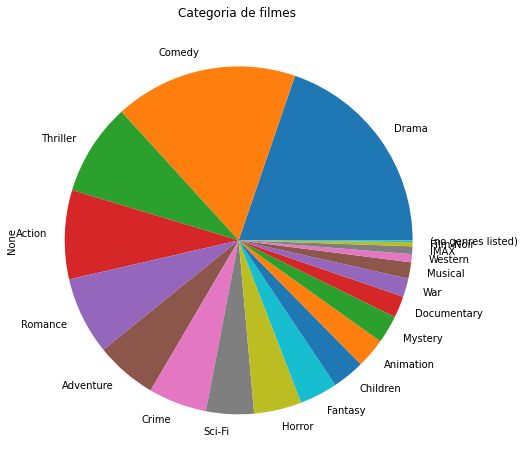

In [29]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie',
    title = 'Categoria de filmes ',
    figsize=(8,8)
    )

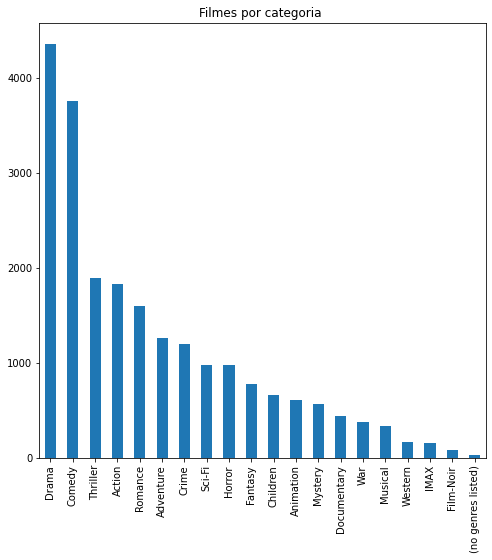

In [30]:
filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar',
    title = 'Filmes por categoria ',
    figsize=(8,8)
    )

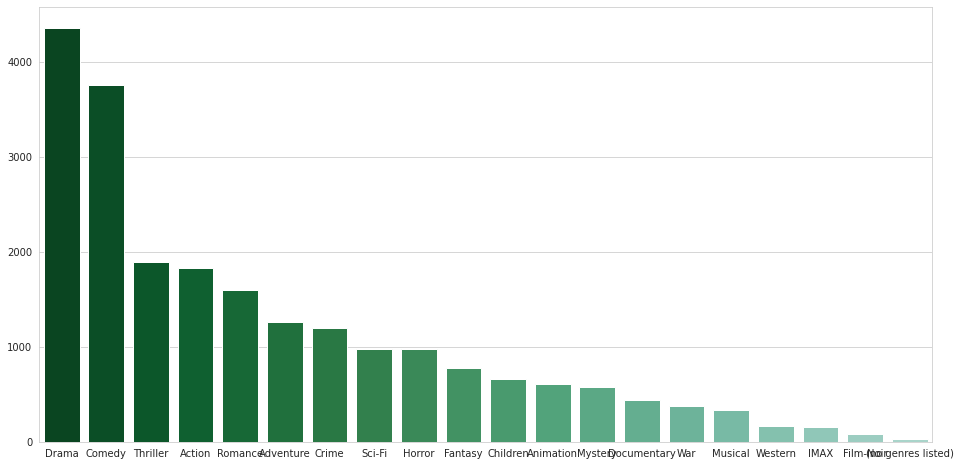

In [31]:
filmes_por_genero = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r',n_colors=len(filmes_por_genero)+ 10))
plt.show()

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'filmeId=={n}')['nota']
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

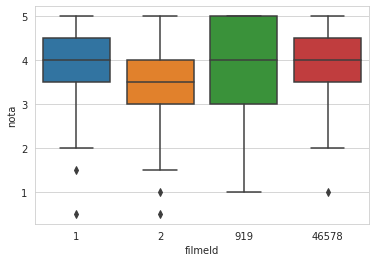

In [33]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"),x="filmeId",y="nota")

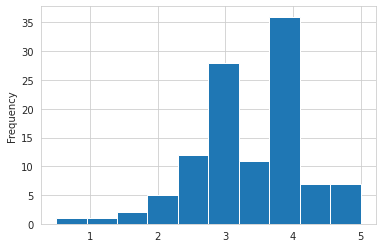

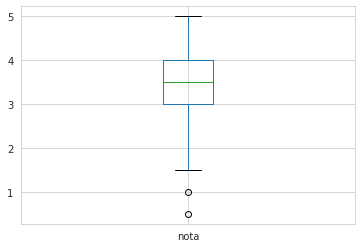

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [34]:
plot_filme(2)

#Desafio 1 
Rotacionar os thicks(os nomes dor generos)(45º)


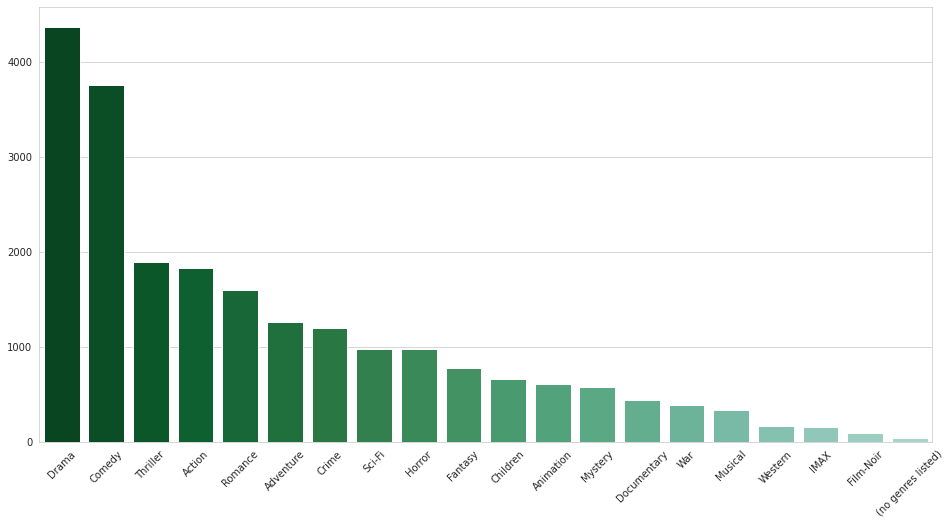

In [35]:
filmes_por_genero = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
df1 = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r',n_colors=len(filmes_por_genero)+ 10))
df1.set_xticklabels(df1.get_xticklabels(),rotation=45)
plt.show()

#Desafio 2
comparar outros filmes com as media parecida e achar distribuição diferente

In [36]:
filmes.sort_values(by='media',ascending=False)[6400:6425]

,filmeId,titulo,generos,media,votos_totais
2668,3571,Time Code (2000),Comedy|Drama,3.0,2.0
9086,143257,Ashby (2015),Comedy|Drama,3.0,2.0
5671,27667,Ju-on: The Curse (2000),Horror,3.0,1.0
4013,5670,Comedian (2002),Comedy|Documentary,3.0,2.0
4597,6837,Love Affair (1939),Comedy|Drama|Romance,3.0,1.0
9101,144222,Bros Before Hos (2013),Comedy,3.0,1.0
294,336,"Walking Dead, The (1995)",Drama|War,3.0,1.0
289,331,Tom & Viv (1994),Drama,3.0,2.0
2656,3554,Love and Basketball (2000),Drama|Romance,3.0,3.0
288,330,Tales from the Hood (1995),Action|Crime|Horror,3.0,6.0


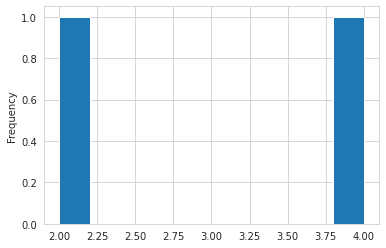

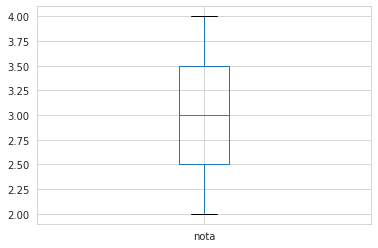

count    2.000000
mean     3.000000
std      1.414214
min      2.000000
25%      2.500000
50%      3.000000
75%      3.500000
max      4.000000
Name: nota, dtype: float64

In [37]:
plot_filme(3571)#Time Code(2000)

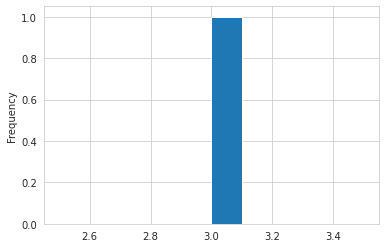

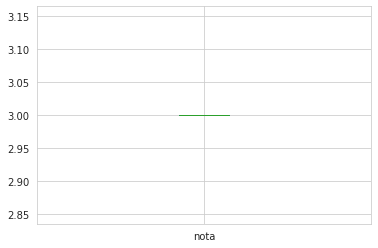

count    1.0
mean     3.0
std      NaN
min      3.0
25%      3.0
50%      3.0
75%      3.0
max      3.0
Name: nota, dtype: float64

In [38]:
plot_filme(5749)#Ghost Story (1981)

#Time Code(2000) 
Teve apenas dois votos sendo 1 e 4 assim dando a media de 3(vale nota que esta media esta estranha pois a soma em 1+4 = 5 e 5/2 é 2,5)
#Ghost Story (1981) - 
Teve apenas um unico voto sendo ele 3

#Desafio 3
Criar o boxplot dos 10 filmes com mais votos(não é com a maior média, é os mais votados)
#Desafio 4
O boxplot estar num tamanho adequado e com os nomes dos filmes no thicks

In [0]:
top_10_mais_votados = filmes.sort_values(by='votos_totais',ascending=False).head(10)['filmeId'].tolist()

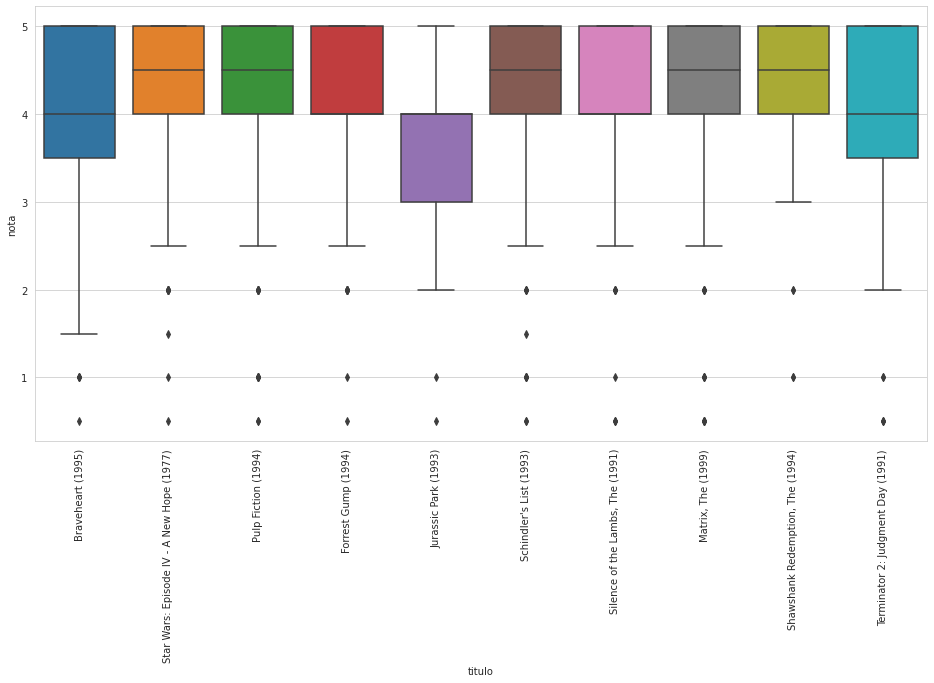

In [40]:
plt.figure(figsize=(16,8))
top_10_data = avaliacoes.query(f"filmeId in {top_10_mais_votados}").merge(filmes[['filmeId','titulo']],on='filmeId')
df34 = sns.boxplot(data = top_10_data,x="titulo",y="nota")
df34.set_xticklabels(df34.get_xticklabels(),rotation=90)
plt.show()

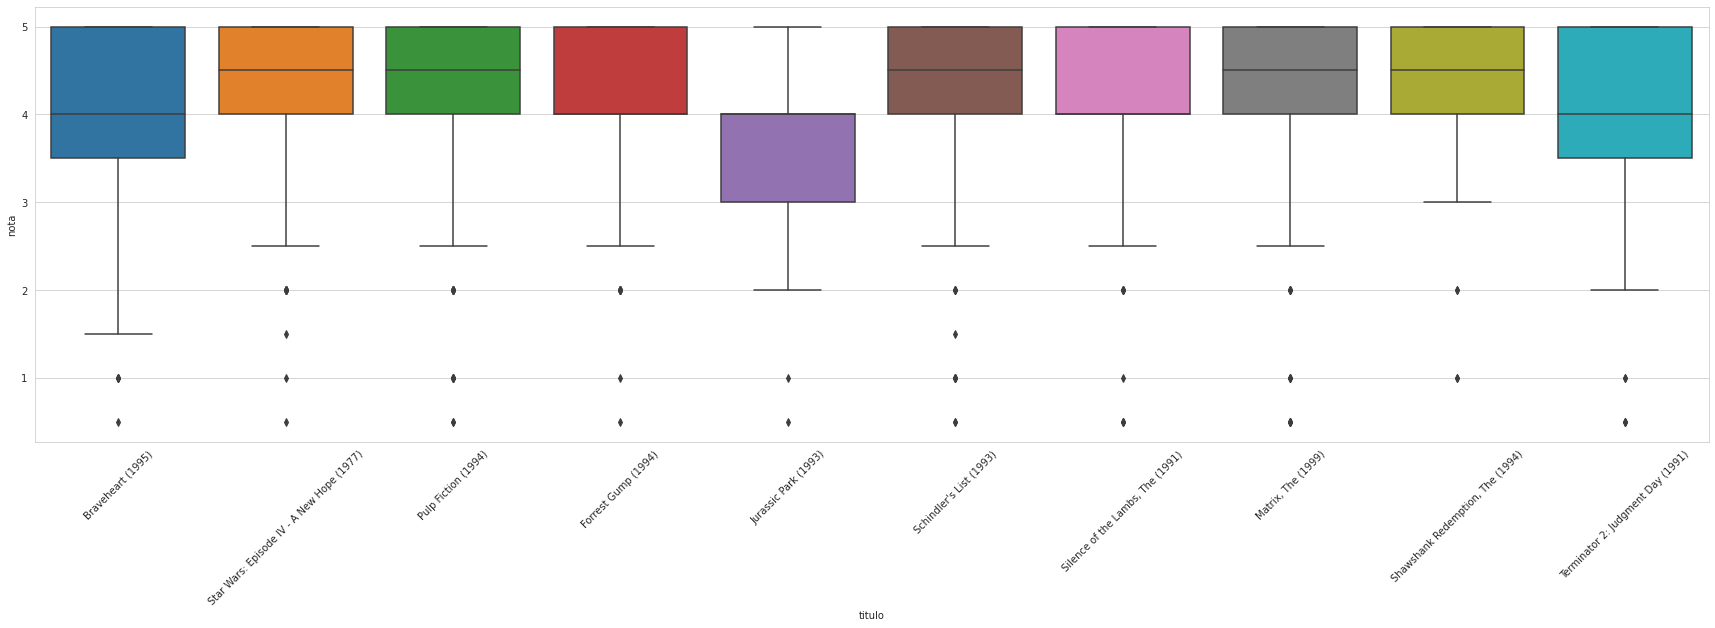

In [41]:
plt.figure(figsize=(30,8))
top_10_data = avaliacoes.query(f"filmeId in {top_10_mais_votados}").merge(filmes[['filmeId','titulo']],on='filmeId')
df34 = sns.boxplot(data = top_10_data,x="titulo",y="nota")
df34.set_xticklabels(df34.get_xticklabels(),rotation=45)
plt.show()

#Desafio5
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais proxima de 0.5, 3 e 5

In [0]:
filmes_mediana = avaliacoes.groupby('filmeId')['nota'].median()

In [44]:
filmes.join(filmes_mediana,on='filmeId')

,filmeId,titulo,generos,media,votos_totais,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0,3.5
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0,3.0
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0,4.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0,3.5
9739,193585,Flint (2017),Drama,3.50,1.0,3.5
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0,3.5


In [0]:
filmes.rename( columns={'nota': 'mediana'},inplace=True)

In [56]:
filmes_moda = pd.Series.mide(avaliacoes.groupby('filmeId')['nota'])

AttributeError: ignored